1. Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun. 
Dördüncü sınıftaki öğrencilerin sayısı ile sekizinci sınıftaki öğrencilerin sayısı farklı. 
Bu yüzden ağırlıklı ortalamaya ihtiyacınız olacak!

2. Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? 
Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır?

3. Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! 
Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?

4. Oluşturduğunuz genel not ortalaması ve ilk temel bileşen arasındaki korelasyon nedir?

5. Modeliniz için en uygun değişkenleri seçmeniz gerektiğinde, harcama kalemlerinin yerine 
ilk temel değişkenleri tercih eder miydiniz? Neden?

In [1]:
#1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.mlab  as mlabPCA      
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [3]:
#usa = pd.read_csv("veri_kumeleri/states_all.csv")
usa = pd.read_excel("veri_kumeleri/states_all.xls", encoding="utf8")
usa.head()

,Unnamed: 0,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,0,1992_ALABAMA,ALABAMA,1992,802724.705882,2678885.0,304177.0,1659028.0,715680.0,2653798.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.307067
1,1,1992_ALASKA,ALASKA,1992,802724.705882,1049591.0,106780.0,720711.0,222100.0,972488.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,218.410116,266.360319,212.712256,258.859712
2,2,1992_ARIZONA,ARIZONA,1992,802724.705882,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,3,1992_ARKANSAS,ARKANSAS,1992,802724.705882,1711959.0,178571.0,958785.0,574603.0,1743022.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,4,1992_CALIFORNIA,CALIFORNIA,1992,802724.705882,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.307067


In [4]:
usa["WEIGTED_AVERAGE_GRADE"]=(usa.GRADES_4_G*usa.AVG_READING_4_SCORE+usa.GRADES_4_G*usa.AVG_MATH_4_SCORE+
usa.GRADES_8_G*usa.AVG_READING_8_SCORE+usa.GRADES_8_G*usa.AVG_MATH_8_SCORE)/(2*(usa.GRADES_4_G+usa.GRADES_8_G))
usa.head()

,Unnamed: 0,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,WEIGTED_AVERAGE_GRADE
0,0,1992_ALABAMA,ALABAMA,1992,802724.705882,2678885.0,304177.0,1659028.0,715680.0,2653798.0,...,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.307067,232.962962
1,1,1992_ALASKA,ALASKA,1992,802724.705882,1049591.0,106780.0,720711.0,222100.0,972488.0,...,8789.0,6714.0,79117.0,30847.0,112335.0,218.410116,266.360319,212.712256,258.859712,237.868580
2,2,1992_ARIZONA,ARIZONA,1992,802724.705882,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,...,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,235.639070
3,3,1992_ARKANSAS,ARKANSAS,1992,802724.705882,1711959.0,178571.0,958785.0,574603.0,1743022.0,...,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,235.441283
4,4,1992_CALIFORNIA,CALIFORNIA,1992,802724.705882,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,...,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.307067,230.242239


In [5]:
#2

In [6]:
usa_df = usa.filter(['WEIGTED_AVERAGE_GRADE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE',
                     'SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE'], axis=1)
usa_korelasyon = usa_df.corr()
usa_korelasyon

,WEIGTED_AVERAGE_GRADE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
WEIGTED_AVERAGE_GRADE,1.000000,0.190986,0.193582,0.202405,0.148528,0.125601
TOTAL_EXPENDITURE,0.190986,1.000000,0.991426,0.993362,0.943120,0.931872
INSTRUCTION_EXPENDITURE,0.193582,0.991426,1.000000,0.977137,0.906923,0.895611
SUPPORT_SERVICES_EXPENDITURE,0.202405,0.993362,0.977137,1.000000,0.949429,0.917028
OTHER_EXPENDITURE,0.148528,0.943120,0.906923,0.949429,1.000000,0.919490
CAPITAL_OUTLAY_EXPENDITURE,0.125601,0.931872,0.895611,0.917028,0.919490,1.000000


Text(0.5, 1, 'Korelasyon Matrisi (USA)')

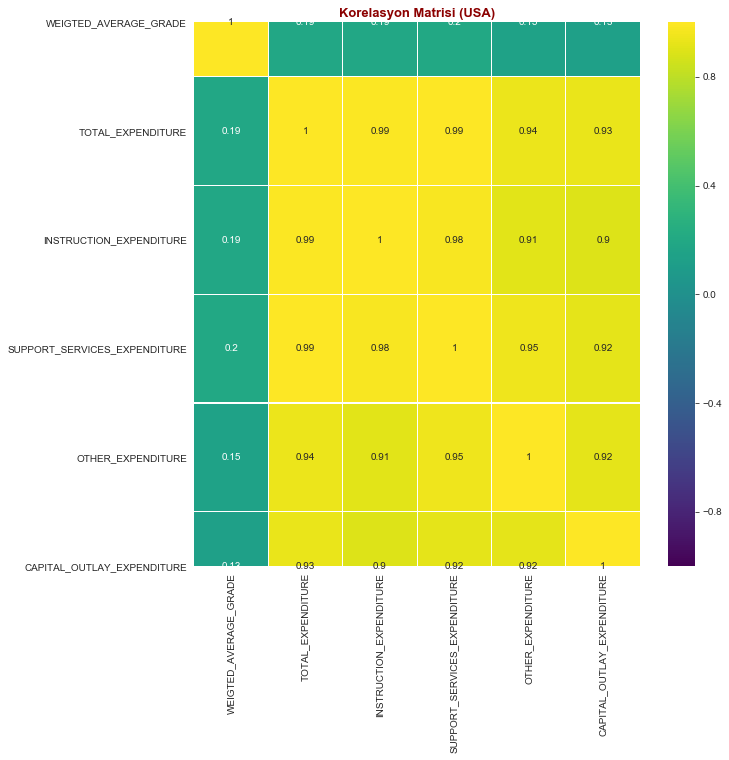

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(usa_korelasyon, annot=True, linewidths=.1, vmin=-1, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (USA)", fontdict = baslik_font)

SUPPORT_SERVICES_EXPENDITURE kaleminin korrelasyonu diğerlerine göre daha fazladır

In [8]:
#3

In [16]:
import numpy as np
from sklearn.decomposition import PCA
#pca = PCA(n_components=4)
#pca.fit(usa_df)  
#PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,  svd_solver='auto', tol=0.0, whiten=False)
#pca.explained_variance_ratio_ 
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(usa_df)
sklearn_pca.explained_variance_ratio_

array([9.94915288e-01, 3.74446366e-03, 1.13438090e-03, 1.28499587e-04])

In [10]:
#4 

In [19]:
cordf=pd.DataFrame()
cordf["WEIGTED_AVERAGE_GRADE"]=usa["WEIGTED_AVERAGE_GRADE"]
cordf["First_Main"]=pd.DataFrame(Y_sklearn)[0]
cordf.corr()

,WEIGTED_AVERAGE_GRADE,First_Main
WEIGTED_AVERAGE_GRADE,1.000000,0.192044
First_Main,0.192044,1.000000


In [20]:
#5 

Evet Tercih ederdim. Ağırlı ortalama olarak hesapladığımız değer  diğer değerleri büyük ölçüde karşılamaktadır.